<a href="https://colab.research.google.com/github/Rich-sam/-sentiment-analysis-model/blob/main/geoglows_forecasts_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Accessing GEOGLOWS Forecast Data

GEOGLOWS forecast data is available through the AWS Open Data Program and also via a REST web data service. You will achieve the best performance accessing data using the AWS data source and can use it to do more complicated queries. You may also bulk download data from AWS. The REST data service makes it possible to perform simpler queries in a wider range of programming languages and via web browsers.

You can choose between either the AWS Open Data Program or a REST web data service endpoint as the data source for your data queries. Each function accepts a "data_source" argument. By default, you query the REST service for forecasts.

```python
# Retrieve from the AWS Open Data Program buckets
geoglows.data.forecast(river_number, data_source='aws')
# Retrieve from the REST web data service
geoglows.data.forecast(river_number, data_source='rest')
```

- The data service documentation is found at https://geoglows.ecmwf.int.
- Instructions for accessing the forecasts or bulk downloading are found on https://data.geoglows.org

In this tutorial, you will use the authoritative ```geoglows``` python package which will help you query forecast and retrospective data.


In [2]:
!pip install geoglows>=1 -q &> pip.log

In [3]:
import geoglows

In [4]:
geoglows.__version__

'2.2.0'

# Select a river

Rivers in the GEOGLOWS model have a globally unique numbering system borrowed from the TDX-Hydro source dataset. These numbers can be found by using the web app tools for browing the model data or by downloading the GIS datasets and filtering them to the location you're interested in. Please refer to https://data.geoglows.org/tutorials/finding-river-numbers.

A few well known rivers are given below as examples you can pick from.

| River        | ID number    |
|--------------|--------------|
| Mississippi  | 760_021_611  |
| Nile         | 160_064_246  |
| Colorado     | 710_431_167  |
| Ganges       | 441_057_380  |
| Mekong       | 430_157_411  |
| Tiber        | 210_406_913  |
| Amazon       | 621_010_293  |
| Congo        | 130_747_391  |
| Parana       | 640_255_644  |


In [5]:
reach_id = 160_242_807  # Nzoia River Outlet

# Forecast Datasets

## Simple Forecast

Each day, GEOGLOWS produces 52 equally probable river discharge predictions. These are created from the ensemble of weather predictions made by the ECMWF Integrated Forecast System.

The easiest way to digest this information is the simple forecast. The simple forecast shows a single best guess of river discharge surrounded by a range of uncertainty. You can interpret this graph by viewing any flow within the envelope as being probable outcome.

Specifically, the simple forecast is the median of all ensembles at each time step and the envelope of uncertainty is the 20th and 80th percentile flow at each time step.

In [6]:
sf = geoglows.data.forecast(reach_id)

Date not specified. Must be searched on s3. Specify the date for fastest results.


In [7]:
geoglows.plots.forecast(sf)

## Forecast Statistics

To give a slightly more comprehensive summary of the forecast, view the Forecast Statistics dataset. This provides additional uncertainty envelopes The narrowest uncertainty window is the most probable outcome. The wider range of flows in the larger uncertatiny window could also be possible but are more extreme predictions by the model.

Specifically, Forecast Stats shows the maximum, 75th percentile, median, mean, 25th percentile, and minimum flow from each ensemble at each time step.

In [8]:
stats = geoglows.data.forecast_stats(reach_id)

Date not specified. Must be searched on s3. Specify the date for fastest results.


In [9]:
stats

,flow_min,flow_25p,flow_avg,flow_med,flow_75p,flow_max,high_res
time,,,,,,,
2026-01-09 00:00:00+00:00,20.860001,20.860001,20.860001,20.860001,20.860001,20.860001,21.290001
2026-01-09 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,20.860001
2026-01-09 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,20.420000
2026-01-09 03:00:00+00:00,19.549999,19.549999,19.549999,19.549999,19.549999,19.549999,19.980000
2026-01-09 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,19.549999
...,...,...,...,...,...,...,...
2026-01-23 09:00:00+00:00,6.450000,8.320000,9.002156,9.000000,9.670000,12.430000,NaN
2026-01-23 12:00:00+00:00,6.470000,8.370000,9.002942,8.990000,9.635000,12.410000,NaN
2026-01-23 15:00:00+00:00,6.480000,8.365000,8.995489,8.970000,9.575000,12.380000,NaN


In [10]:
geoglows.plots.forecast_stats(stats)

## Forecast Ensembles

To view the entire unsimplified streamflow prediction on a river, use the Forecast Ensembles dataset. Each of the 52 unique predictions is returned. You can summarize them how you choose or use them for additional analysis. We provide the following guidance.

- Each time series should be viewed as equally probable. The forecast which ends up being the best prediction of reality was viewed as equally probable as all others by the computation process.
- The numbering system does is not preserved from day to day (ensemble 6 today is not the same meteorology outcome used to create ensemble 6 yesterday).
- Ensembles 1-51 are from the ECMWF ENS product. They have 3 hour time steps for 15 days
- Ensemble 52 is created from the ECMWF HRES product. It has a 1 hour time step for 10 days.

In [11]:
ens = geoglows.data.forecast_ensembles(reach_id)

Date not specified. Must be searched on s3. Specify the date for fastest results.


In [12]:
geoglows.plots.forecast_ensembles(ens)

## Forecast Records

The Forecast Records dataset shows the average predicted flow in a river during the preceeding days to months. You should use this dataset to gain additional context on the recent trends on the river

Each day when a forecast simulation is prepared, we save a recorded of the average flow predicted for the next 24 hours. 24 hours later when the next forecast is prepared, the average flow from this record is used as the initial value.



In [14]:
rec = geoglows.data.forecast_records(reach_id)

RuntimeError: Received an error from the REST API: {"error":"Invalid request: Length mismatch: Expected axis has 0 elements, new values have 1 elements"}


In [ ]:
geoglows.plots.forecast_records(rec)

# Use Forecast Ensembles to compute other forecast summaries

The raw output from the GEOGLOWS numerical model is the Forecast Ensembles dataset. The simple forecast and forecast statistics datasets are computed from the ensembles output.

If you need to produce many plots, maps, summary statistics, or other analysis, you should download only the ensemble statistics. The geoglows Python package  has analysis functions to calculate the derivatives. This is faster than making multiple data download requests and protects the data services from abuse.

In [ ]:
ens = geoglows.data.forecast_ensembles(reach_id)

In [ ]:
simple_forecast = geoglows.analyze.simple_forecast(ens)

In [ ]:
simple_forecast

,flow_uncertainty_upper,flow_median,flow_uncertainty_lower
time,,,
2024-04-30 00:00:00,459.989990,459.989990,459.989990
2024-04-30 03:00:00,462.079987,462.079987,462.079987
2024-04-30 06:00:00,464.079987,464.079987,464.079987
2024-04-30 09:00:00,466.019989,466.019989,466.019989
2024-04-30 12:00:00,467.890015,467.890015,467.880005
...,...,...,...
2024-05-14 09:00:00,372.410004,372.279999,372.170013
2024-05-14 12:00:00,372.970001,372.839996,372.700012
2024-05-14 15:00:00,373.369995,373.209991,373.059998


In [ ]:
forecast_stats = geoglows.analyze.forecast_stats(ens)

In [ ]:
forecast_stats

,flow_min,flow_25p,flow_avg,flow_med,flow_75p,flow_max,high_res
time,,,,,,,
2024-04-30 00:00:00,459.989990,459.989990,459.989990,459.989990,459.989990,459.989990,459.279999
2024-04-30 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,459.989990
2024-04-30 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,460.700012
2024-04-30 03:00:00,462.079987,462.079987,462.079987,462.079987,462.079987,462.079987,461.390015
2024-04-30 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,462.079987
...,...,...,...,...,...,...,...
2024-05-14 09:00:00,371.980011,372.195007,372.302734,372.279999,372.390015,372.829987,NaN
2024-05-14 12:00:00,372.500000,372.735001,372.859222,372.839996,372.970001,373.459991,NaN
2024-05-14 15:00:00,372.839996,373.089996,373.238251,373.209991,373.354996,373.920013,NaN


# Example Application - Calculating Volumes of Discharged Water

GEOGLOWS data provide discharge (or streamflow) data. The units of discharge are cubic meters per second, m^3/s, or volume of water per second. Each value is the average flow that occured over the preceeding 3 hours. With this information, we can calculate the volume of water that was discharged over that time period.

We can accomplish this calculation using a right handed Riemann sum and a triangular approximation. Delta t is the timestep, Qt is the discharge, Q, at time t.

$\text{Volume}_t = (Q_t \cdot Δt) - \left[(Q_t - Q_{t-1}) \cdot Δt \cdot 0.5\right]$





In [ ]:
# Get a forecast on a river and date where a flood was predicted
forecast = geoglows.data.forecast(reach_id)
forecast = forecast[['flow_median', ]]

In [ ]:
timestep_in_seconds = (forecast.index[1] - forecast.index[0]).seconds
f'Timestep is {timestep_in_seconds} seconds'

'Timestep is 10800 seconds'

In [ ]:
forecast

,flow_median
time,
2024-04-30 00:00:00,459.989990
2024-04-30 03:00:00,462.079987
2024-04-30 06:00:00,464.079987
2024-04-30 09:00:00,466.019989
2024-04-30 12:00:00,467.890015
...,...
2024-05-14 09:00:00,372.279999
2024-05-14 12:00:00,372.839996
2024-05-14 15:00:00,373.209991


In [ ]:
volume_discharged_incremental = (forecast.iloc[1:] * timestep_in_seconds) - (forecast.diff().dropna() * timestep_in_seconds * 0.5)

In [ ]:
volume_discharged_incremental

,flow_median
time,
2024-04-30 03:00:00,4979178.0
2024-04-30 06:00:00,5001264.0
2024-04-30 09:00:00,5022540.0
2024-04-30 12:00:00,5043114.0
2024-04-30 15:00:00,5062878.0
...,...
2024-05-14 09:00:00,4016736.0
2024-05-14 12:00:00,4023648.0
2024-05-14 15:00:00,4028670.0


<Axes: xlabel='time'>

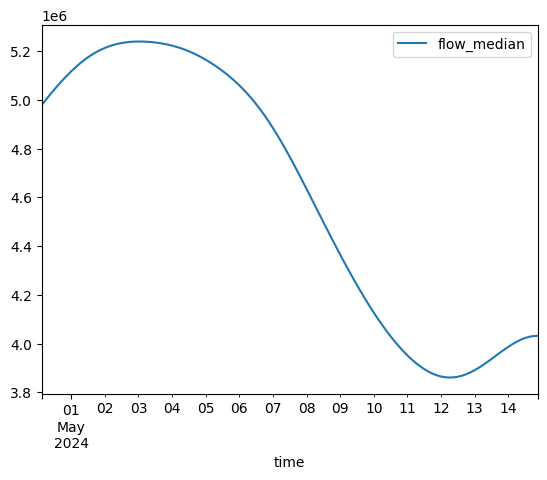

In [ ]:
volume_discharged_incremental.plot()

In [ ]:
volume_discharged_cumulative = volume_discharged_incremental.cumsum()

In [ ]:
volume_discharged_cumulative

,flow_median
time,
2024-04-30 03:00:00,4979178.0
2024-04-30 06:00:00,9980442.0
2024-04-30 09:00:00,15002982.0
2024-04-30 12:00:00,20046096.0
2024-04-30 15:00:00,25108974.0
...,...
2024-05-14 09:00:00,533313568.0
2024-05-14 12:00:00,537337216.0
2024-05-14 15:00:00,541365888.0


<Axes: xlabel='time'>

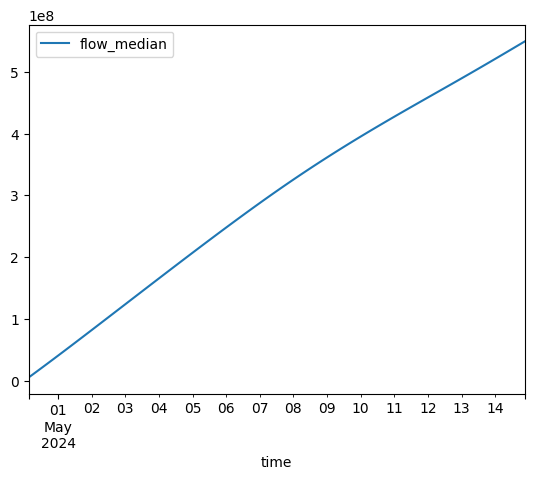

In [ ]:
volume_discharged_cumulative.plot()